# Figure 2: Stability

Here, we re-create a plot in Figure 2 (a) from 

- M. Beg *et al.* Stable and manipulable Bloch point. [*Scientific Reports* **9**, 7959](https://www.nature.com/articles/s41598-019-44462-2) (2019).

### (optional) Micromagnetic simulations

This notebook uses results from `*.txt` files which are already in this repository. The script used to generate result files is `src/stability.py` and if you want to re-execute micromagnetic simulations, please run:

    $ make stability
    
Micromagnetic simulations will be run inside [Docker](https://www.docker.com/) container, which contains all the necessary software. Therefore, please make sure you have Docker installed on your machine - installation instructions can be found [here](https://docs.docker.com/install/).

Details about Docker images, VTK, and H5 files can be found in `README.md` file of [`marijanbeg/2019-paper-bloch-point-stability`](https://github.com/marijanbeg/2019-paper-bloch-point-stability) GitHub repository.

### Plot
    
We start by reading the results from `*.txt` files:

In [1]:
import os
import numpy as np

# geometry parameters
d = 150  # disk diameter (nm)
hb = 20  # bottom layer thickness (nm)

S_top = []  # skyrmion number in the top-layer
S_bottom = []  # skyrmion number in the bottom-layer
ht_array = np.arange(2, 19, 1)  # range of top-layer thicknesses in nm
for ht in ht_array:
    basename = f'd{d}hb{hb}ht{ht}'
    rdir = os.path.join('..', 'results', 'stability', basename)
    with open(os.path.join(rdir, f'{basename}.txt'), 'r') as f:
        data = eval(f.read())

    S_top.append(data['S_top']/ht)
    S_bottom.append(data['S_bottom']/hb)

Finally, we can create the plot:

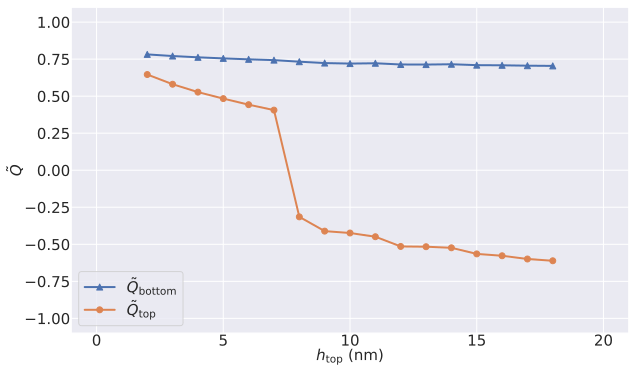

In [2]:
%config InlineBackend.figure_formats = ['svg']  # output matplotlib plots as SVG
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.style.use('customstyle.mplstyle')

plt.figure(figsize=(10, 6))
plt.plot(ht_array, S_bottom, '^-', label=r'$\tilde{Q}_\mathrm{bottom}$')
plt.plot(ht_array, S_top, 'o-', label=r'$\tilde{Q}_\mathrm{top}$')
plt.xlabel(r'$h_\mathrm{top}$ (nm)')
plt.ylabel(r'$\tilde{Q}$')
plt.ylim([-1.1, 1.1])
plt.xlim([-1, 21])
plt.xticks([0, 5, 10, 15, 20])
plt.legend()
plt.show()